Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


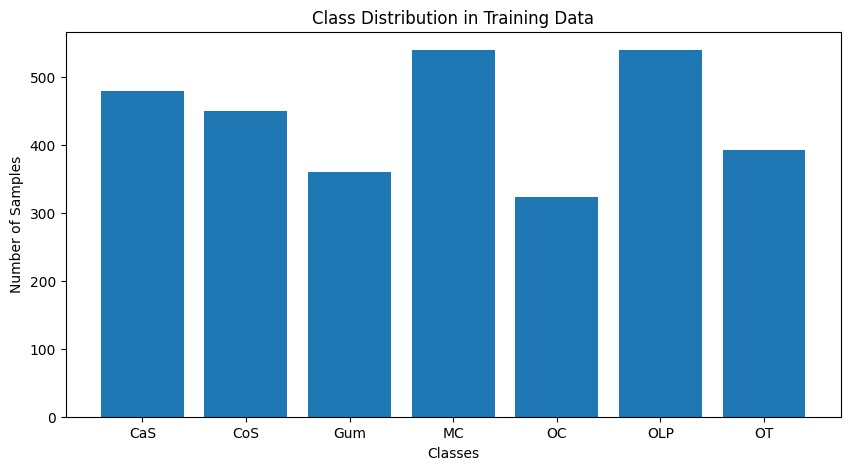

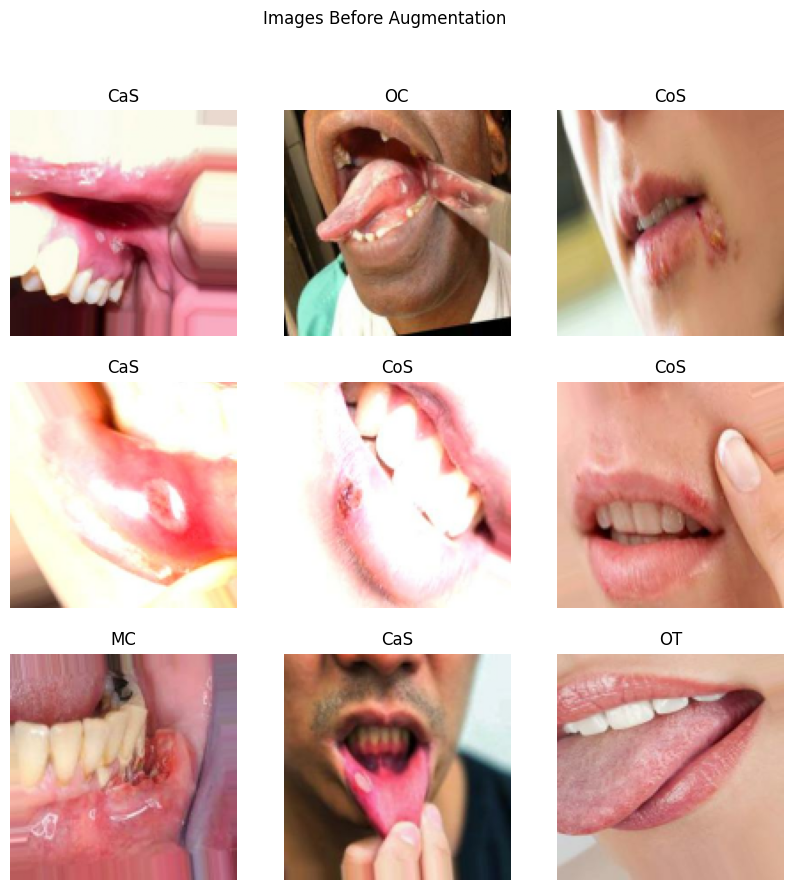

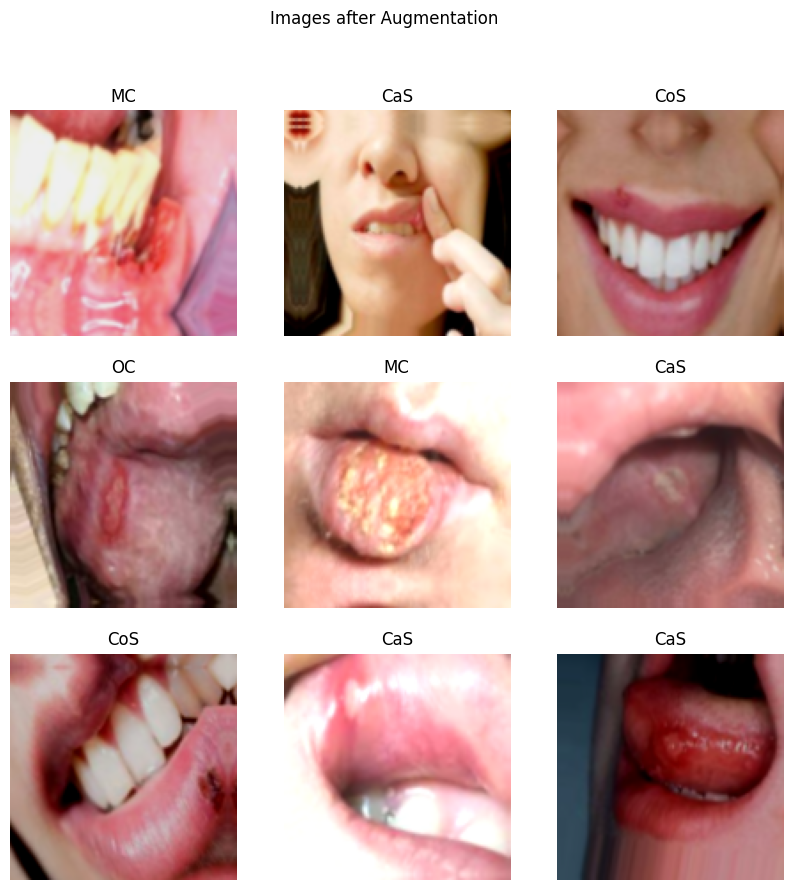

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,768,263 (33.45 MB)

 Trainable params: 8,768,263 (33.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 79s 659ms/step - accuracy: 0.1644 - loss: 1.9538 - val_accuracy: 0.2091 - val_loss: 1.9000
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 609ms/step - accuracy: 0.2185 - loss: 1.9092
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 658ms/step - accuracy: 0.2348 - loss: 1.8618 - val_accuracy: 0.3103 - val_loss: 1.7510
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 612ms/step - accuracy: 0.2705 - loss: 1.7954
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 657ms/step - accuracy: 0.3183 - loss: 1.7391 - val_accuracy: 0.3774 - val_loss: 1.6739
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 607ms/step - accuracy: 0.3596 - loss: 1.6476
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 65s 668ms/step - accuracy: 0.3872 - loss: 1.6015 - val_accuracy: 0.4737 - val_loss: 1.4398
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 59s 605ms/step - accuracy: 0.4358 - loss: 1.4834
Epoch 9/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 64s 662ms/step - accuracy: 0.4721 - loss: 1.4118 - val_accuracy: 0.5126 - val_loss: 1.3378
Epoch 1

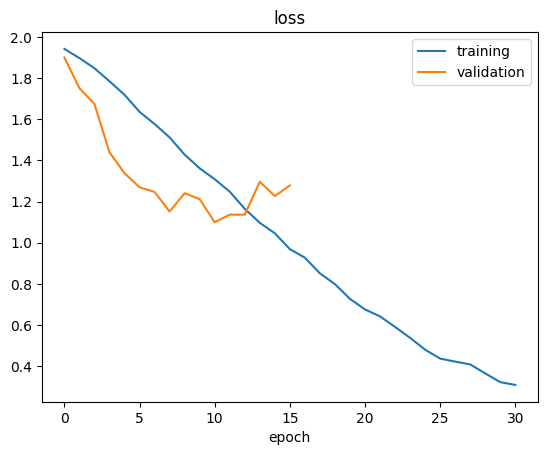

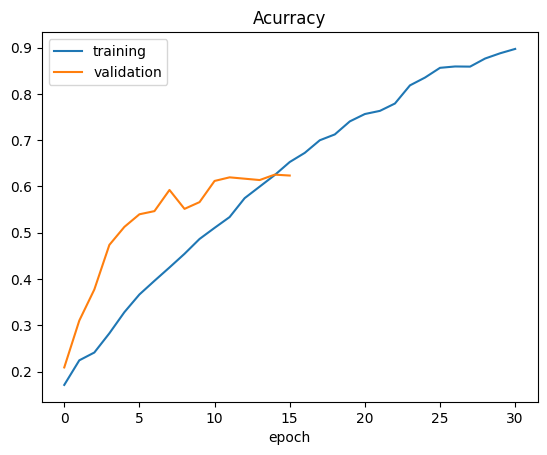

In [2]:
##imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras.callbacks import EarlyStopping

###loading data 
train_dir='Teeth_Dataset/Training/'
val_dir='Teeth_Dataset/validation/'
test_dir='Teeth_Dataset/Testing/'
image_size=(128,128)
batch_size=32

train_data=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb")

val_data=tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb")


test_data=tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    color_mode="rgb" )

train_class_names=train_data.class_names

##preprocessing 
#1.Normalization
#2.Augumentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),  
    tf.keras.layers.RandomRotation(0.1),  
    tf.keras.layers.RandomZoom(0.2),  
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  
    tf.keras.layers.RandomContrast(0.2),  
    tf.keras.layers.RandomBrightness(factor=0.2) 
])

def normalize_Augmentation(image,label):
    image=data_augmentation(image)
    image=tf.cast(image,tf.float32)/255.0
    return image,label

def normalize(image,label):
    image=tf.cast(image,tf.float32)/255.0
    return image,label

train_data_before_augmentation=train_data.map(normalize)
train_data_after_augmentation=train_data.map(normalize_Augmentation)
def train_data_prep (data,shuffle_size,batch_size):
    data=data.map(normalize_Augmentation)
    data=data.cache()
    data=data.shuffle(shuffle_size).repeat()
    data=data.prefetch(1)
    return data

def test_data_prep (data,batch_size):
    data=data.map(normalize)
    data=data.cache()
    data=data.prefetch(1)
    return data

train_data_prepared=train_data_prep(train_data,shuffle_size=1000,batch_size=batch_size)
test_data_prepared=test_data_prep(test_data,batch_size=batch_size)
val_data_prepared=test_data_prep(val_data,batch_size=batch_size)

##Distribution of Training data 
class_counts=[0]*len(train_class_names)
for _, labels in train_data:
    for label in labels.numpy():
        class_counts[label] += 1

plt.figure(figsize=(10, 5))
plt.bar(train_class_names, class_counts)
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Data')
plt.show()

##display images 
def display_images(dataset, num_images=9, title="Images"):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(train_class_names[labels[i].numpy()])
            plt.axis("off")
    plt.suptitle(title)
    plt.show()

# Display images before augmentation
display_images(train_data_before_augmentation,9, title="Images Before Augmentation")
display_images(train_data_after_augmentation,9, title="Images after Augmentation")

input_shape = (128, 128, 3)
model_cnn = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,padding='same', activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=128, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=7, activation='softmax')
])

model_cnn.summary()
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,          # Stop if no improvement for 5 epochs
    restore_best_weights=True  # Restore model weights from the best epoch
)

# Training Model with Early Stopping
history = model_cnn.fit(
    train_data_prepared,
    validation_data=val_data_prepared,
    epochs=50,  
    steps_per_epoch=len(train_data), 
    validation_steps=len(val_data),  
    callbacks=[early_stopping]  # Add the EarlyStopping callback
)

###visualizing Model Results
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
## plot Training and validation accuracy )
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()


In [3]:
model_cnn.evaluate(test_data_prepared)

33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6428 - loss: 1.0121


[1.0905303955078125, 0.6206225752830505]

In [5]:
# Save the trained model in Keras format
model_cnn.save('trained_teeth_model.keras')